In [1]:
import experimental_design.config as config
parameter_space = config.get_parameter_space()

In [2]:
def to_single_value_dict(d: dict) -> dict:
    for (k, n) in list(zip(d.keys(), config.cfg.NAMES.values())):
        d[n] = d[k][0]
        del d[k]
    return d

In [3]:
print(config.cfg.NAMES.values())

dict_values(['Grid Size', 'Edge Max Speed (m/s)', 'Vehicle Max Speed (m/s)', 'Edge Length (m)', 'Number of Lanes', 'Acceleration (m/s$^2$)'])


In [4]:
import pickle

random = False
mv = False
ivr = True

if random:
    timeloss_emukit_model = pickle.load(open('../experimental_design/models/250_random_points_supervised_GP_timeloss.pkl', "rb"))
    emissions_emukit_model = pickle.load(open('../experimental_design/models/270_random_points_supervised_GP_co2.pkl', "rb"))
elif mv:
    timeloss_emukit_model = pickle.load(open('../experimental_design/models/model_variance_20_init_points_250_loops_timeloss.pkl', "rb"))
    emissions_emukit_model = pickle.load(open('../experimental_design/models/model_variance_20_init_points_250_loops_co2.pkl', "rb"))
elif ivr:
    timeloss_emukit_model = pickle.load(open('../experimental_design/models/integrated_variance_reduction_20_init_points_250_loops_timeloss.pkl', "rb"))
    emissions_emukit_model = pickle.load(open('../experimental_design/models/integrated_variance_reduction_20_init_points_250_loops_co2.pkl', "rb"))

In [5]:
from emukit.sensitivity.monte_carlo import MonteCarloSensitivity

num_monte_carlo_points=10000#500000

timeloss_sensitivity_sumo=MonteCarloSensitivity(model=timeloss_emukit_model, input_domain=parameter_space)
timeloss_main_effects, timeloss_total_effects, _ = timeloss_sensitivity_sumo.compute_effects(num_monte_carlo_points=num_monte_carlo_points)

emissions_sensitivity_sumo=MonteCarloSensitivity(model=emissions_emukit_model, input_domain=parameter_space)
emissions_main_effects, emissions_total_effects, _ = emissions_sensitivity_sumo.compute_effects(num_monte_carlo_points=num_monte_carlo_points)

In [6]:
main_effects_dict = {
    'Time Loss': to_single_value_dict(timeloss_main_effects),
    'Emissions': to_single_value_dict(emissions_main_effects),
}
total_effects_dict = {
    'Time Loss': to_single_value_dict(timeloss_total_effects),
    'Emissions': to_single_value_dict(emissions_total_effects),
}

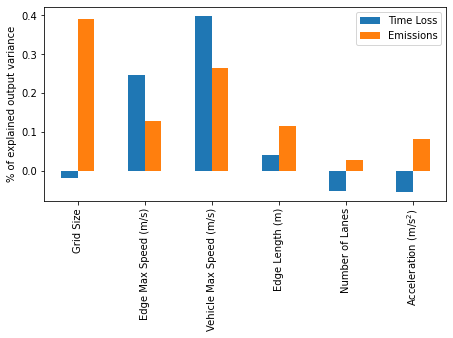

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6.4, 4.8))
pd.DataFrame(main_effects_dict).plot.bar(ax=ax)
# ax1.set_title('First-order Sobol')
ax.set_ylabel('% of explained output variance')
fig.tight_layout()
fig.savefig('main_effects.pdf', format='pdf')

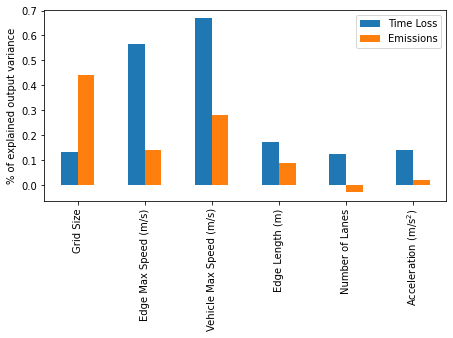

In [16]:
fig, ax = plt.subplots(figsize=(6.4, 4.8))
pd.DataFrame(total_effects_dict).plot.bar(ax=ax)
# ax2.set_title('Total Effects')
ax.set_ylabel('% of explained output variance')
fig.tight_layout()
fig.savefig('total_effects.pdf', format='pdf')